# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from tqdm import tqdm_notebook

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [66]:
city = citipy.nearest_city(22.99, 120.21)
city.city_name
city.country_code

'tw'

In [67]:
# List for storing Latitude and Longitude
lat_lngs = []
cities = []

# Store today's date
current_date = pd.to_datetime('today').strftime('%m/%d/%Y')

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [69]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
counter = 1
sett = 1
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
#print(api_key)
#print(query_url)

# Read each city name, pass it to the api and collect data for the respective city
for city in tqdm_notebook(cities):      
    
    try: 
        response = requests.get(query_url + city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {counter} of set {sett} | {city}")
        
        if counter <50:
            counter= counter + 1   
        else:
            counter = 1
            sett = sett + 1
    
    except:
        print("City not found. Skipping...")


Processing Record 1 of set 1 | mecca
Processing Record 2 of set 1 | karratha
Processing Record 3 of set 1 | avarua
Processing Record 4 of set 1 | cape town
Processing Record 5 of set 1 | qaanaaq
Processing Record 6 of set 1 | punta arenas
City not found. Skipping...
Processing Record 7 of set 1 | norman wells
Processing Record 8 of set 1 | longhua
Processing Record 9 of set 1 | grindavik
Processing Record 10 of set 1 | bluff
Processing Record 11 of set 1 | luancheng
Processing Record 12 of set 1 | gainesville
Processing Record 13 of set 1 | marawi
City not found. Skipping...
Processing Record 14 of set 1 | parabel
Processing Record 15 of set 1 | rikitea
City not found. Skipping...
Processing Record 16 of set 1 | hobart
City not found. Skipping...
Processing Record 17 of set 1 | port hedland
Processing Record 18 of set 1 | alihe
Processing Record 19 of set 1 | port elizabeth
Processing Record 20 of set 1 | port alfred
Processing Record 21 of set 1 | busselton
Processing Record 22 of set

Processing Record 36 of set 4 | batagay-alyta
Processing Record 37 of set 4 | sao jose da coroa grande
Processing Record 38 of set 4 | klaksvik
Processing Record 39 of set 4 | banjar
Processing Record 40 of set 4 | lebu
Processing Record 41 of set 4 | orotukan
Processing Record 42 of set 4 | san patricio
Processing Record 43 of set 4 | jiayuguan
Processing Record 44 of set 4 | nisia floresta
Processing Record 45 of set 4 | palauig
Processing Record 46 of set 4 | sorong
Processing Record 47 of set 4 | phalaborwa
Processing Record 48 of set 4 | tongliao
Processing Record 49 of set 4 | flinders
City not found. Skipping...
City not found. Skipping...
Processing Record 50 of set 4 | namatanai
Processing Record 1 of set 5 | yibin
City not found. Skipping...
Processing Record 2 of set 5 | vila franca do campo
Processing Record 3 of set 5 | camargo
Processing Record 4 of set 5 | mehamn
Processing Record 5 of set 5 | amapa
Processing Record 6 of set 5 | boa vista
Processing Record 7 of set 5 | 

Processing Record 21 of set 8 | collie
Processing Record 22 of set 8 | myrtle beach
Processing Record 23 of set 8 | carnarvon
Processing Record 24 of set 8 | sambava
Processing Record 25 of set 8 | hofn
Processing Record 26 of set 8 | lambarene
Processing Record 27 of set 8 | soissons
City not found. Skipping...
Processing Record 28 of set 8 | kem
Processing Record 29 of set 8 | pleszew
Processing Record 30 of set 8 | ostrogozhsk
Processing Record 31 of set 8 | comodoro rivadavia
Processing Record 32 of set 8 | chandbali
Processing Record 33 of set 8 | jutai
City not found. Skipping...
Processing Record 34 of set 8 | surman
Processing Record 35 of set 8 | gamboula
Processing Record 36 of set 8 | ikryanoye
Processing Record 37 of set 8 | makat
Processing Record 38 of set 8 | baykit
Processing Record 39 of set 8 | ouro preto do oeste
Processing Record 40 of set 8 | taga
Processing Record 41 of set 8 | kyshtovka
Processing Record 42 of set 8 | prince rupert
Processing Record 43 of set 8 |

Processing Record 6 of set 12 | lewistown
Processing Record 7 of set 12 | faanui
Processing Record 8 of set 12 | evensk
Processing Record 9 of set 12 | nantucket
Processing Record 10 of set 12 | port-cartier
Processing Record 11 of set 12 | batemans bay
Processing Record 12 of set 12 | richards bay
Processing Record 13 of set 12 | knysna
Processing Record 14 of set 12 | salinopolis
Processing Record 15 of set 12 | haines junction
Processing Record 16 of set 12 | kudat
Processing Record 17 of set 12 | rundu
Processing Record 18 of set 12 | santiago de cuba
City not found. Skipping...
Processing Record 19 of set 12 | vikhorevka
City not found. Skipping...
Processing Record 20 of set 12 | jati
Processing Record 21 of set 12 | marsala



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [90]:
#Create a dataframe for the Cities data
cities_df = pd.DataFrame({'City':city_name,'Cloudiness':cloudiness, 'Country':country,
                          'Date':date,'Humidity':humidity,'Lat':lat,'Lng':lng,
                          'Max Temp':max_temp,'Wind Speed':wind_speed})
#Display the Dataframe
cities_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mecca,82,SA,1563744602,33,21.43,39.83,87.99,6.82
1,Karratha,0,AU,1563744368,43,-20.74,116.85,62.25,7.90
2,Avarua,99,CK,1563744467,88,-21.21,-159.78,77.00,10.29
3,Cape Town,0,ZA,1563744552,71,-33.93,18.42,55.00,3.36
4,Qaanaaq,100,GL,1563744322,76,77.48,-69.36,40.47,3.89


In [100]:
#Export the city data into a .csv.
cities_df.to_csv('city_weather_data.csv',index=False)
cities_df[cities_df['Humidity'] > 100].head()
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mecca,82,SA,1563744602,33,21.43,39.83,87.99,6.82
1,Karratha,0,AU,1563744368,43,-20.74,116.85,62.25,7.90
2,Avarua,99,CK,1563744467,88,-21.21,-159.78,77.00,10.29
3,Cape Town,0,ZA,1563744552,71,-33.93,18.42,55.00,3.36
4,Qaanaaq,100,GL,1563744322,76,77.48,-69.36,40.47,3.89


In [99]:
#Find the Range of Latitudes. Describe the dataset

min_lat = min(cities_df['Lat'])
max_lat = max(cities_df['Lat'])
range_lat = max_lat - min_lat
print("The range of Latitudes for this analysis is: " + str(range_lat))
cities_df['Lat'].describe()

The range of Latitudes for this analysis is: 133.03


count    571.000000
mean      18.516900
std       32.848437
min      -54.810000
25%       -7.165000
50%       20.890000
75%       46.435000
max       78.220000
Name: Lat, dtype: float64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

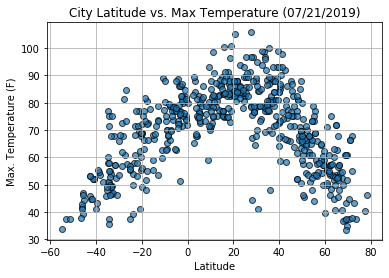

In [72]:
lat_df = cities_df['Lat']
max_temp_df = cities_df['Max Temp']

fig, ax = plt.subplots()
ax.scatter(lat_df, max_temp_df,
            edgecolor="black",label="City Temperature v Latitude",marker='o', alpha=0.7)
ax.grid()
ax.set_title("City Latitude vs. Max Temperature (" + current_date + ")")
ax.set_ylabel("Max. Temperature (F)")
ax.set_xlabel("Latitude")
plt.show()


#### Latitude vs. Humidity Plot

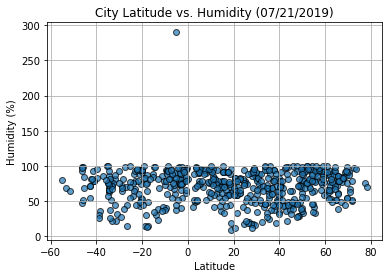

In [79]:

humidity_df = cities_df['Humidity']

fig, ax = plt.subplots()
ax.scatter(lat_df, humidity_df,
            edgecolor="black",label="City Latitude v Humidity",marker='o', alpha=0.7)
ax.grid()
ax.set_title("City Latitude vs. Humidity (" + current_date + ")")
ax.set_ylabel("Humidity (%)")
ax.set_xlabel("Latitude")
plt.show()


#### Latitude vs. Cloudiness Plot

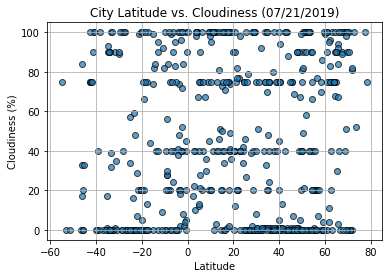

In [89]:
cloudiness_df = cities_df['Cloudiness']

fig, ax = plt.subplots()
ax.scatter(lat_df, cloudiness_df,
            edgecolor="black",label="City Latitude v Cloudiness",marker='o', alpha=0.7)
ax.grid()
ax.set_title("City Latitude vs. Cloudiness (" + current_date + ")")
ax.set_ylabel("Cloudiness (%)")
ax.set_xlabel("Latitude")
plt.show()

#### Latitude vs. Wind Speed Plot

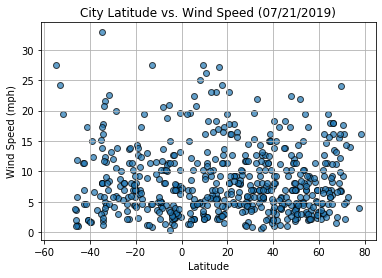

In [91]:
wind_speed_df = cities_df['Wind Speed']

fig, ax = plt.subplots()
ax.scatter(lat_df, wind_speed_df,
            edgecolor="black",label="City Latitude v Wind Speed",marker='o', alpha=0.7)
ax.grid()
ax.set_title("City Latitude vs. Wind Speed (" + current_date + ")")
ax.set_ylabel("Wind Speed (mph)")
ax.set_xlabel("Latitude")
plt.show()

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="
city_data = []
print(api_key)
print(query_url)
print("Beginning Data Retrieval")
print("-----------------------------")


#for city in tqdm_notebook(cities):
#    print("Processing Record "+ 1 +  "of Set 1 | lompoc")
#    response = requests.get(query_url + city).json()
#    city_data.append(response)

#city_data[0]

requests.get(query_url + 'biak').json()

fa383787b4fc3c16d7bd363605e79d91
http://api.openweathermap.org/data/2.5/weather?appid=fa383787b4fc3c16d7bd363605e79d91&units=metric&q=
Beginning Data Retrieval
-----------------------------


{'coord': {'lon': 122.88, 'lat': -0.91},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 24.18,
  'pressure': 1008.9,
  'humidity': 67,
  'temp_min': 24.18,
  'temp_max': 24.18,
  'sea_level': 1008.9,
  'grnd_level': 879.78},
 'wind': {'speed': 1.94, 'deg': 144.754},
 'rain': {'3h': 0.5},
 'clouds': {'all': 52},
 'dt': 1563515403,
 'sys': {'message': 0.0063,
  'country': 'ID',
  'sunrise': 1563486742,
  'sunset': 1563530201},
 'timezone': 28800,
 'id': 1637001,
 'name': 'Biak',
 'cod': 200}